<a href="https://colab.research.google.com/github/narminalijeva/thesis/blob/main/thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
normal_df = pd.read_csv('/content/drive/My Drive/thesis/swat/SWaT_Dataset_Normal_v0.csv')
attack_df = pd.read_csv('/content/drive/My Drive/thesis/swat/SWaT_Dataset_Attack_v0.csv')

In [7]:
# Combine the datasets
combined_df = pd.concat([normal_df, attack_df], ignore_index=True)

In [5]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946719 entries, 0 to 946718
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      946719 non-null  object 
 1   FIT101         946719 non-null  float64
 2   LIT101         946719 non-null  float64
 3   MV101          946719 non-null  int64  
 4   P101           946719 non-null  int64  
 5   P102           946719 non-null  int64  
 6   AIT201         946719 non-null  float64
 7   AIT202         946719 non-null  float64
 8   AIT203         946719 non-null  float64
 9   FIT201         946719 non-null  float64
 10  MV201          946719 non-null  int64  
 11  P201           946719 non-null  int64  
 12  P202           946719 non-null  int64  
 13  P203           946719 non-null  int64  
 14  P204           946719 non-null  int64  
 15  P205           946719 non-null  int64  
 16  P206           946719 non-null  int64  
 17  DPIT301        946719 non-nul

In [6]:
combined_df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [8]:
mode = combined_df["Normal/Attack"].mode()[0]
combined_df["Normal/Attack"].fillna(mode, inplace=True)

<ipython-input-8-023b7c9b972b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df["Normal/Attack"].fillna(mode, inplace=True)


In [9]:
combined_df['Normal/Attack'] = combined_df['Normal/Attack'].replace('A ttack', 'Attack')

In [10]:
combined_df['Normal/Attack'].unique()

array(['Normal', 'Attack'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
label_encoder = LabelEncoder()

# fit and transform the categorical column 'Gender' into numerical labels
combined_df['Normal/Attack'] = label_encoder.fit_transform(combined_df['Normal/Attack'])

In [12]:
class_distribution = combined_df['Normal/Attack'].value_counts()

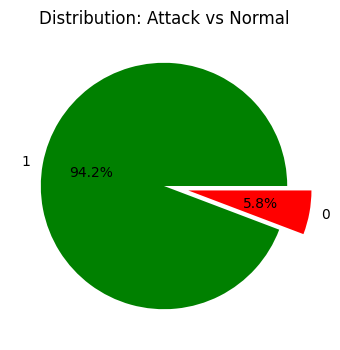

In [13]:
plt.figure(figsize=(4, 4))
plt.pie(class_distribution, labels=class_distribution.index, explode=[0, 0.2], autopct='%1.1f%%', colors=['g', 'r'])
plt.title('Distribution: Attack vs Normal')
plt.show()

In [14]:
combined_df.isna().sum()

,0
Timestamp,0
FIT101,0
LIT101,0
MV101,0
P101,0
P102,0
AIT201,0
AIT202,0
AIT203,0
FIT201,0


In [15]:
columns_with_null = combined_df.columns[combined_df.isnull().any()]

for column in columns_with_null:
    median_value = combined_df[column].median()
    combined_df[column].fillna(median_value, inplace=True)

In [16]:
combined_df['Timestamp'] = combined_df['Timestamp'].str.strip()

In [18]:
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])

In [19]:
combined_df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,1
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,1
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,1
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,1
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,1


In [20]:
def find_duplicate_features(df):
    duplicates = {}
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            if df[cols[i]].equals(df[cols[j]]):
                duplicates.setdefault(cols[i], []).append(cols[j])
    return duplicates

In [22]:
duplicate_features = find_duplicate_features(combined_df.select_dtypes(include=[np.number]))
for original, dupes in duplicate_features.items():
    combined_df.drop(columns=dupes, inplace=True)

In [27]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946719 entries, 0 to 946718
Data columns (total 48 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      946719 non-null  datetime64[ns]
 1   FIT101         946719 non-null  float64       
 2   LIT101         946719 non-null  float64       
 3   MV101          946719 non-null  int64         
 4   P101           946719 non-null  int64         
 5   P102           946719 non-null  int64         
 6   AIT201         946719 non-null  float64       
 7   AIT202         946719 non-null  float64       
 8   AIT203         946719 non-null  float64       
 9   FIT201         946719 non-null  float64       
 10  MV201          946719 non-null  int64         
 11  P201           946719 non-null  int64         
 12  P202           946719 non-null  int64         
 13  P203           946719 non-null  int64         
 14  P204           946719 non-null  int64         
 15  

In [26]:
features_for_correlation = combined_df.drop(columns=['Timestamp', 'Normal/Attack'])

# Convert categorical features to numeric using label encoding or one-hot encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in features_for_correlation.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features_for_correlation[column] = le.fit_transform(features_for_correlation[column])
    label_encoders[column] = le  # Store the label encoder for inverse_transform if needed

# Calculate the correlation matrix
correlation_matrix = features_for_correlation.corr()

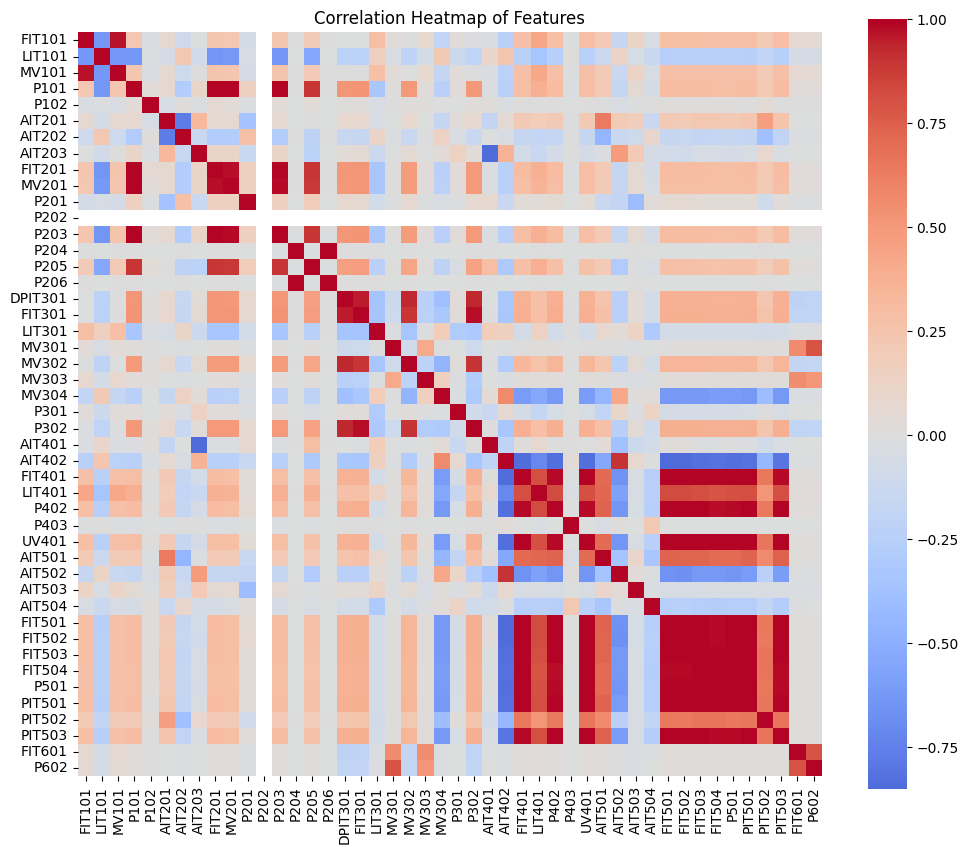

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

In [22]:
print(correlation_matrix)

           FIT101    LIT101     MV101      P101      P102    AIT201    AIT202  \
FIT101   1.000000 -0.634490  0.969149  0.229728 -0.036870  0.064849 -0.105669   
LIT101  -0.634490  1.000000 -0.632022 -0.631073 -0.007039 -0.069220  0.219035   
MV101    0.969149 -0.632022  1.000000  0.238384 -0.035443  0.062483 -0.106939   
P101     0.229728 -0.631073  0.238384  1.000000  0.031698  0.067115 -0.283726   
P102    -0.036870 -0.007039 -0.035443  0.031698  1.000000 -0.051471  0.015521   
AIT201   0.064849 -0.069220  0.062483  0.067115 -0.051471  1.000000 -0.774433   
AIT202  -0.105669  0.219035 -0.106939 -0.283726  0.015521 -0.774433  1.000000   
AIT203   0.000272 -0.088526  0.003800  0.116006 -0.013809  0.332124 -0.133286   
FIT201   0.235111 -0.639324  0.243759  0.991672  0.053161  0.063757 -0.283718   
MV201    0.230072 -0.626706  0.238959  0.986809  0.035293  0.062918 -0.276846   
P201    -0.072584 -0.050718 -0.068880  0.152916 -0.014219 -0.362050  0.272465   
P202          NaN       NaN 

In [29]:
combined_df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,0.001409,0.001664,0.0,1,10.02948,0.0,4.277749,0.000256,1,1
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,0.001409,0.001664,0.0,1,10.02948,0.0,4.277749,0.000256,1,1
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,0.001409,0.001664,0.0,1,10.02948,0.0,4.277749,0.000256,1,1
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,0.001409,0.001664,0.0,1,10.02948,0.0,4.277749,0.000256,1,1
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,0.001409,0.001664,0.0,1,10.02948,0.0,4.277749,0.000256,1,1


In [30]:
# Calculate variance for each feature
numeric_columns = combined_df.select_dtypes(include=[np.number]).columns
feature_variances = combined_df[numeric_columns].var()

# Filter out features with very low variance (set a threshold, e.g., variance < some_value)
low_variance_features = feature_variances[feature_variances < 0.01].index.tolist()
print("Low variance features:", low_variance_features)

Low variance features: ['P102', 'P202', 'P204', 'P206', 'P301', 'P403', 'AIT501', 'FIT504', 'P602']


In [31]:
features_to_remove = set(low_variance_features)
filtered_df = combined_df.drop(columns=list(features_to_remove))

In [32]:
filtered_df.head()

,Timestamp,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,...,AIT504,FIT501,FIT502,FIT503,P501,PIT501,PIT502,PIT503,FIT601,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,244.3284,8.19008,306.101,2.471278,2,...,12.68905,0.001666,0.001409,0.001664,1,10.02948,0.0,4.277749,0.000256,1
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,244.3284,8.19008,306.101,2.468587,2,...,12.68905,0.001666,0.001409,0.001664,1,10.02948,0.0,4.277749,0.000256,1
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,244.3284,8.19008,306.101,2.467305,2,...,12.68905,0.001666,0.001409,0.001664,1,10.02948,0.0,4.277749,0.000256,1
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,244.3284,8.19008,306.101,2.466536,2,...,12.68905,0.001666,0.001409,0.001664,1,10.02948,0.0,4.277749,0.000256,1
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,244.4245,8.19008,306.101,2.466536,2,...,12.68905,0.001666,0.001409,0.001664,1,10.02948,0.0,4.277749,0.000256,1


In [33]:
filtered_df = filtered_df.set_index('Timestamp')

In [34]:
filtered_df.head()

,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,P201,...,AIT504,FIT501,FIT502,FIT503,P501,PIT501,PIT502,PIT503,FIT601,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,244.3284,8.19008,306.101,2.471278,2,1,...,12.68905,0.001666,0.001409,0.001664,1,10.02948,0.0,4.277749,0.000256,1
2015-12-22 16:00:01,2.457163,261.1879,2,2,244.3284,8.19008,306.101,2.468587,2,1,...,12.68905,0.001666,0.001409,0.001664,1,10.02948,0.0,4.277749,0.000256,1
2015-12-22 16:00:02,2.439548,260.9131,2,2,244.3284,8.19008,306.101,2.467305,2,1,...,12.68905,0.001666,0.001409,0.001664,1,10.02948,0.0,4.277749,0.000256,1
2015-12-22 16:00:03,2.428338,260.2850,2,2,244.3284,8.19008,306.101,2.466536,2,1,...,12.68905,0.001666,0.001409,0.001664,1,10.02948,0.0,4.277749,0.000256,1
2015-12-22 16:00:04,2.424815,259.8925,2,2,244.4245,8.19008,306.101,2.466536,2,1,...,12.68905,0.001666,0.001409,0.001664,1,10.02948,0.0,4.277749,0.000256,1


In [35]:
filtered_df.shape

(946719, 38)

In [43]:
important_features = ['LIT101', 'DPIT301', 'LIT301', 'FIT201', 'Normal/Attack']

In [44]:
filtered_df[important_features]

,LIT101,DPIT301,LIT301,FIT201,Normal/Attack
Timestamp,,,,,
2015-12-22 16:00:00,261.5804,20.79839,327.4401,2.471278,1
2015-12-22 16:00:01,261.1879,20.79839,327.4401,2.468587,1
2015-12-22 16:00:02,260.9131,20.84320,327.4401,2.467305,1
2015-12-22 16:00:03,260.2850,20.84320,327.2799,2.466536,1
2015-12-22 16:00:04,259.8925,20.84320,327.1597,2.466536,1
...,...,...,...,...,...
2016-02-01 14:59:55,519.5495,20.39823,974.5498,2.459488,1
2016-02-01 14:59:56,520.4131,20.39823,974.5898,2.459488,1
2016-02-01 14:59:57,520.6878,20.33101,974.2695,2.460129,1
